In [109]:
%matplotlib inline

sys.path.append('../src')

import sys
import time
import numpy
import random as rnd
from matplotlib import pyplot as plt
from quick_find import QuickFind
from quick_union import QuickUnion
from weighted_quick_union import WeightedQuickUnion

def gendata(n):
    return [(rnd.randrange(0, n), rnd.randrange(0, n)) for _ in range(n)]

trials = [x for x in numpy.linspace(10, 2000, 20, dtype=int)]
qf_results = []

for t in trials:
    network = QuickFind(t)
    data = gendata(t)
    begin = time.time()
    for p, q in data:
        network.union(p, q);
    end = time.time()
    qf_results.append(end - begin)

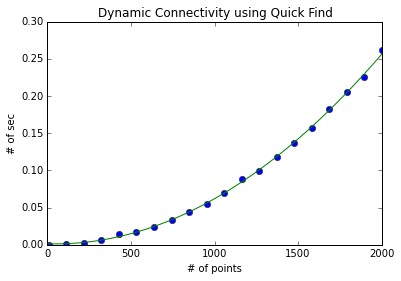

In [110]:
fit = numpy.polyfit(trials, qf_results, 2) 
polynomial = numpy.poly1d(fit)
xx = numpy.linspace(0, 2000, 100)

plt.plot(trials, qf_results, 'o', xx, polynomial(xx), '-g')
plt.title('Dynamic Connectivity using Quick Find')
plt.xlabel('# of points')
plt.ylabel('# of sec')
plt.show()

In [111]:
qu_results = []

for t in trials:
    network = QuickUnion(t)
    data = gendata(t)
    begin = time.time()
    for p, q in data:
        network.union(p, q);
    end = time.time()
    qu_results.append(end - begin)

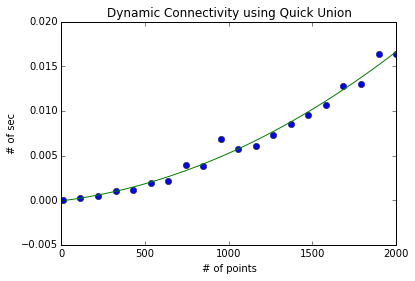

In [112]:
fit = numpy.polyfit(trials, qu_results, 2) 
polynomial = numpy.poly1d(fit)
xx = numpy.linspace(0, 2000, 100)

plt.plot(trials, qu_results, 'o', xx, polynomial(xx), '-g')
plt.title('Dynamic Connectivity using Quick Union')
plt.xlabel('# of points')
plt.ylabel('# of sec')
plt.show()

In [113]:
wqu_results = []

for t in trials:
    network = WeightedQuickUnion(t)
    data = gendata(t)
    begin = time.time()
    for p, q in data:
        network.union(p, q);
    end = time.time()
    wqu_results.append(end - begin)

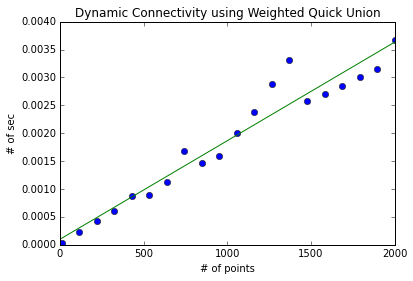

In [115]:
fit = numpy.polyfit(trials, wqu_results, 1) 
polynomial = numpy.poly1d(fit)
xx = numpy.linspace(0, 2000, 100)

plt.plot(trials, wqu_results, 'o', xx, polynomial(xx), '-g')
plt.title('Dynamic Connectivity using Weighted Quick Union')
plt.xlabel('# of points')
plt.ylabel('# of sec')
plt.show()

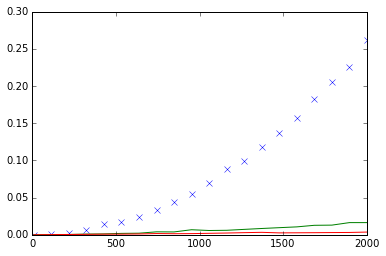

In [119]:
plt.plot(trials, qf_results, 'x', trials, qu_results, '-g', trials, wqu_results, '-r')
plt.show()